In [15]:
import pandas as pd
import numpy as np

_____________________________________________________________________________________________

**Loading Shark Attack Data**

In [16]:
file_path= "GSAF5.csv"

In [17]:
sharks_df = pd.read_csv(file_path)

____________________________________________________________________________________________

**Cleaning Shark Attack Data**

In [18]:
#Already cleaned before uploaded:
#Deleted approx 60k empty rows.
#Converted values from str to num for year and age columns.

In [19]:
#There are 15 columns and 6940 rows.
sharks_df.shape

(6940, 15)

In [20]:
#Percentage of rows missing data per column.
sharks_df.isna().sum()/len(sharks_df)*100

Date         0.000000
Year         0.028818
Type         0.259366
Country      0.720461
State        6.945245
Location     8.141210
Activity     8.429395
Name         3.155620
Sex          8.342939
Age         43.126801
Injury       0.504323
Fatal        8.083573
Time        50.792507
Species     45.129683
Source       0.273775
dtype: float64

In [21]:
display(sharks_df)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Source
0,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
1,04-Feb-2024,2024.0,Provoked,TRINIDAD,NaN,NaN,Spearfishing,male,M,NaN,Shoulder bitten,N,06h30,Blacktip reef shark,"Trinidad Guardian, 2/11/2014"
2,29 Jan-2024,2024.0,Unprovoked,AUSTRALIA,New South Wales,"Elizabeth Bay, Sydney Harbor",Swimming,Lauren O'Neill,F,29,Right leg bitten,N,20h00,Bull shark,"Nine News, 12/31/2024"
3,15 Jan-2024,2024.0,Unprovoked,BAHAMAS,Paradise Island,Paradise Island Resort,Swimming,male,M,10,Right leg injured,N,16h00,NaN,"Caribbean Loop News, 1/15;2024"
4,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surfing,Murray Adams,M,64,Leg bitten,N,13h00,White shark,"A. Currie, GSAF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6935,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6936,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6937,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6938,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


____________________________________________________________________________________________

**Cleaning Each Column**

In [22]:
#Cleaning the "Year" column and converting to object
sharks_df["Year"] = sharks_df["Year"].fillna("UNKNOWN")  # Fill all empty cells with "UNKNOWN"
sharks_df["Year"] = sharks_df["Year"].astype(str)  # Convert the column to string type

In [23]:
#Cleaning the "Fatal" column and converting to object
sharks_df["Fatal"] = sharks_df["Fatal"].fillna("UNKNOWN")  # Fill all empty cells with "UNKNOWN"
sharks_df["Fatal"] = sharks_df["Fatal"].replace({"M":"UNKNOWN","F":"UNKNOWN","Nq":"UNKNOWN","2017":"UNKNOWN",
                                                  "Y x 2":"UNKNOWN"," N":"N","N ":"N","y":"Y","n":"N"})

In [24]:
#Cleaning "Sex" column
sharks_df["Sex"] = sharks_df["Sex"].fillna("UNKNOWN") 
sharks_df["Sex"]=sharks_df["Sex"].replace({"Unknown":"UNKNOWN","lli":"UNKNOWN",
                                           "M x 2":"UNKNOWN","N":"UNKNOWN",
                                           ".":"UNKNOWN"," M":"M", 
                                           "M ":"M"})

In [25]:
#Cleaning "Type" column
sharks_df["Type"] = sharks_df["Type"].fillna("UNKNOWN") 
sharks_df["Type"]=sharks_df["Type"].replace({" Provoked":"Provoked","Boat":"Watercraft",
                                             "Sea Disaster":"Disaster","nan":"UNKNOWN","?":"UNKNOWN",
                                             "Unconfirmed":"UNKNOWN","Unverified":"UNKNOWN","Invalid":"UNKNOWN",
                                             "Under investigation":"UNKNOWN"})

In [26]:
#Cleaning "Country" column
sharks_df["Country"] = sharks_df["Country"].fillna("UNKNOWN") #Fill all empty cells with "UNKNOWN"
sharks_df["Country"] = sharks_df["Country"].str.strip() #remove all spaces
#Map all values to the correct country in uppercase or to UNKNOWN if not a coutnry.
sharks_df["Country"] = sharks_df["Country"].replace({
    'INDIA': 'INDIA',
    'TRINIDAD': 'TRINIDAD & TOBAGO',
    'AUSTRALIA': 'AUSTRALIA',
    'BAHAMAS': 'BAHAMAS',
    'SOUTH AFRICA': 'SOUTH AFRICA',
    'USA': 'USA',
    'MEXICO': 'MEXICO',
    'NEW ZEALAND': 'NEW ZEALAND',
    'EGYPT': 'EGYPT',
    'Mexico': 'MEXICO',
    'BELIZE': 'BELIZE',
    'PHILIPPINES': 'PHILIPPINES',
    'Coral Sea': 'UKNOWN',
    'SPAIN': 'SPAIN',
    'PORTUGAL': 'PORTUGAL',
    'SAMOA': 'SAMOA',
    'COLOMBIA': 'COLOMBIA',
    'ECUADOR': 'ECUADOR',
    'FRENCH POLYNESIA': 'FRENCH POLYNESIA',
    'NEW CALEDONIA': 'NEW CALEDONIA',
    'TURKS and CaICOS': 'TURKS & CAICOS',
    'CUBA': 'CUBA',
    'BRAZIL': 'BRAZIL',
    'SEYCHELLES': 'SEYCHELLES',
    'ARGENTINA': 'ARGENTINA',
    'FIJI': 'FIJI',
    'MeXICO': 'MEXICO',
    'Maldives': 'MALDIVES',
    'ENGLAND': 'ENGLAND',
    'JAPAN': 'JAPAN',
    'INDONESIA': 'INDONESIA',
    'JAMAICA': 'JAMAICA',
    'MALDIVES': 'MALDIVES',
    'THAILAND': 'THAILAND',
    'COLUMBIA': 'COLOMBIA',
    'COSTA RICA': 'COSTA RICA',
    'New Zealand': 'NEW ZEALAND',
    'British Overseas Territory': 'UKNOWN',
    'CANADA': 'CANADA',
    'JORDAN': 'JORDAN',
    'ST KITTS / NEVIS': 'NEVIS',
    'ST MARTIN': 'ST MARTIN',
    'PAPUA NEW GUINEA': 'PAPUA NEW GUINEA',
    'REUNION ISLAND': 'REUNION',
    'ISRAEL': 'ISRAEL',
    'CHINA': 'CHINA',
    'IRELAND': 'IRELAND',
    'ITALY': 'ITALY',
    'MALAYSIA': 'MALAYSIA',
    'LIBYA': 'LIBYA',
    'nan': 'UKNOWN',
    'MAURITIUS': 'MAURITIUS',
    'SOLOMON ISLANDS': 'SOLOMON ISLANDS',
    'ST HELENA, British overseas territory': 'ST HELENA',
    'COMOROS': 'COMOROS',
    'REUNION': 'REUNION',
    'UNITED KINGDOM': 'UNITED KINGDOM',
    'UNITED ARAB EMIRATES': 'UNITED ARAB EMIRATES (UAE)',
    'CAPE VERDE': 'CAPE VERDE',
    'DOMINICAN REPUBLIC': 'DOMINICAN REPUBLIC',
    'CAYMAN ISLANDS': 'CAYMAN ISLANDS',
    'ARUBA': 'ARUBA',
    'MOZAMBIQUE': 'MOZAMBIQUE',
    'PUERTO RICO': 'PUERTO RICO',
    'ATLANTIC OCEAN': 'UKNOWN',
    'GREECE': 'GREECE',
    'ST. MARTIN': 'ST MARTIN',
    'FRANCE': 'FRANCE',
    'TRINIDAD & TOBAGO': 'TRINIDAD & TOBAGO',
    'KIRIBATI': 'KIRIBATI',
    'DIEGO GARCIA': 'DIEGO GARCIA',
    'TAIWAN': 'TAIWAN',
    'PALESTINIAN TERRITORIES': 'PALESTINIAN TERRITORIES',
    'GUAM': 'GUAM',
    'NIGERIA': 'NIGERIA',
    'TONGA': 'TONGA',
    'SCOTLAND': 'SCOTLAND',
    'CROATIA': 'CROATIA',
    'SAUDI ARABIA': 'SAUDI ARABIA',
    'CHILE': 'CHILE',
    'ANTIGUA': 'ANTIGUA',
    'KENYA': 'KENYA',
    'RUSSIA': 'RUSSIA',
    'TURKS & CAICOS': 'TURKS & CAICOS',
    'UNITED ARAB EMIRATES (UAE)': 'UNITED ARAB EMIRATES (UAE)',
    'AZORES': 'AZORES',
    'SOUTH KOREA': 'SOUTH KOREA',
    'MALTA': 'MALTA',
    'VIETNAM': 'VIETNAM',
    'MADAGASCAR': 'MADAGASCAR',
    'PANAMA': 'PANAMA',
    'SOMALIA': 'SOMALIA',
    'NEVIS': 'NEVIS',
    'BRITISH VIRGIN ISLANDS': 'BRITISH VIRGIN ISLANDS',
    'NORWAY': 'NORWAY',
    'SENEGAL': 'SENEGAL',
    'YEMEN': 'YEMEN',
    'GULF OF ADEN': 'UKNOWN',
    'Sierra Leone': 'SIERRA LEONE',
    'ST. MAARTIN': 'ST MARTIN',
    'GRAND CAYMAN': 'GRAND CAYMAN',
    'Seychelles': 'SEYCHELLES',
    'LIBERIA': 'LIBERIA',
    'VANUATU': 'VANUATU',
    'HONDURAS': 'HONDURAS',
    'VENEZUELA': 'VENEZUELA',
    'SRI LANKA': 'SRI LANKA',
    'URUGUAY': 'URUGUAY',
    'MICRONESIA': 'MICRONESIA',
    'CARIBBEAN SEA': 'UKNOWN',
    'OKINAWA': 'JAPAN',
    'TANZANIA': 'TANZANIA',
    'MARSHALL ISLANDS': 'MARSHALL ISLANDS',
    'EGYPT / ISRAEL': 'UKNOWN',
    'NORTHERN ARABIAN SEA': 'UKNOWN',
    'HONG KONG': 'HONG KONG',
    'EL SALVADOR': 'EL SALVADOR',
    'ANGOLA': 'ANGOLA',
    'BERMUDA': 'BERMUDA',
    'MONTENEGRO': 'MONTENEGRO',
    'IRAN': 'IRAN',
    'TUNISIA': 'TUNISIA',
    'NAMIBIA': 'NAMIBIA',
    'NORTH ATLANTIC OCEAN': 'UKNOWN',
    'SOUTH CHINA SEA': 'UKNOWN',
    'BANGLADESH': 'BANGLADESH',
    'PALAU': 'PALAU',
    'WESTERN SAMOA': 'WESTERN SAMOA',
    'PACIFIC OCEAN': 'UKNOWN',
    'BRITISH ISLES': 'BRITISH ISLES',
    'GRENADA': 'GRENADA',
    'IRAQ': 'IRAQ',
    'TURKEY': 'TURKEY',
    'SINGAPORE': 'SINGAPORE',
    'NEW BRITAIN': 'UKNOWN',
    'SUDAN': 'SUDAN',
    'JOHNSTON ISLAND': 'JOHNSTON ISLAND',
    'SOUTH PACIFIC OCEAN': 'UKNOWN',
    'NEW GUINEA': 'NEW GUINEA',
    'RED SEA': 'UKNOWN',
    'NORTH PACIFIC OCEAN': 'UKNOWN',
    'FEDERATED STATES OF MICRONESIA': 'MICRONESIA',
    'MID ATLANTIC OCEAN': 'UKNOWN',
    'ADMIRALTY ISLANDS': 'ADMIRALTY ISLANDS',
    'BRITISH WEST INDIES': 'UNKNOWN',
    'SOUTH ATLANTIC OCEAN': 'UKNOWN',
    'PERSIAN GULF': 'UKNOWN',
    'RED SEA / INDIAN OCEAN': 'UKNOWN',
    'NORTH SEA': 'UKNOWN',
    'NICARAGUA': 'NICARAGUA',
    'MALDIVE ISLANDS': 'MALDIVES',
    'AMERICAN SAMOA': 'AMERICAN SAMOA',
    'ANDAMAN / NICOBAR ISLANDAS': 'UKNOWN',
    'GABON': 'GABON',
    'MAYOTTE': 'MAYOTTE',
    'THE BALKANS': 'UKNOWN',
    'SUDAN?': 'SUDAN',
    'MARTINIQUE': 'MARTINIQUE',
    'INDIAN OCEAN': 'UKNOWN',
    'GUATEMALA': 'GUATEMALA',
    'NETHERLANDS ANTILLES': 'UKNOWN',
    'NORTHERN MARIANA ISLANDS': 'NORTHERN MARIANA ISLANDS',
    'IRAN / IRAQ': 'UKNOWN',
    'JAVA': 'JAVA',
    'SIERRA LEONE': 'SIERRA LEONE',
    'CENTRAL PACIFIC': 'UKNOWN',
    'SOLOMON ISLANDS / VANUATU': 'UKNOWN',
    'SOUTHWEST PACIFIC OCEAN': 'UKNOWN',
    'BAY OF BENGAL': 'UKNOWN',
    'MID-PACIFC OCEAN': 'UKNOWN',
    'SLOVENIA': 'SLOVENIA',
    'CURACAO': 'CURACAO',
    'ICELAND': 'ICELAND',
    'ITALY / CROATIA': 'UKNOWN',
    'BARBADOS': 'BARBADOS',
    'MONACO': 'MONACO',
    'GUYANA': 'GUYANA',
    'HAITI': 'HAITI',
    'SAN DOMINGO': 'UKNOWN',
    'KUWAIT': 'KUWAIT',
    'FALKLAND ISLANDS': 'FALKLAND ISLANDS',
    'CRETE': 'CRETE',
    'CYPRUS': 'CYPRUS',
    'WEST INDIES': 'WEST INDIES',
    'BURMA': 'BURMA',
    'LEBANON': 'LEBANON',
    'PARAGUAY': 'PARAGUAY',
    'BRITISH NEW GUINEA': 'UKNOWN',
    'CEYLON': 'SRI LANKA',
    'OCEAN': 'UKNOWN',
    'GEORGIA': 'GEORGIA',
    'SYRIA': 'SYRIA',
    'TUVALU': 'TUVALU',
    'INDIAN OCEAN?': 'UKNOWN',
    'GUINEA': 'GUINEA',
    'ANDAMAN ISLANDS': 'ANDAMAN ISLANDS',
    'EQUATORIAL GUINEA / CAMEROON': 'UKNOWN',
    'COOK ISLANDS': 'COOK ISLANDS',
    'TOBAGO': 'TOBAGO',
    'PERU': 'PERU',
    'AFRICA': 'UKNOWN',
    'ALGERIA': 'ALGERIA',
    'Coast of AFRICA': 'UKNOWN',
    'TASMAN SEA': 'UKNOWN',
    'GHANA': 'GHANA',
    'GREENLAND': 'GREENLAND',
    'MEDITERRANEAN SEA': 'UKNOWN',
    'SWEDEN': 'SWEDEN',
    'ROATAN': 'ROATAN',
    'Between PORTUGAL & INDIA': 'UKNOWN',
    'DJIBOUTI': 'DJIBOUTI',
    'BAHREIN': 'BAHREIN',
    'KOREA': 'KOREA',
    'RED SEA?': 'UKNOWN',
    'ASIA?': 'UKNOWN',
    'CEYLON (SRI LANKA)': 'SRI LANKA',
    'nan':"UNKNOWN"
})
sharks_df["Country"] = sharks_df["Country"].str.upper()


In [50]:
#Cleaning the "Activity" data

sharks_df["Activity"].tail()
#Fill missing values
sharks_df['Activity'] = sharks_df['Activity'].fillna('unknown')
#Standardize Text Format
sharks_df['Activity'] = sharks_df['Activity'].str.lower()
#remove all spaces
sharks_df['Activity'] = sharks_df['Activity'].str.strip()
# categorize the activity 
def categorize_activity(activity):
    activity = str(activity).lower()
    if 'surf' in activity:
        return 'surfing'
    elif 'swim' in activity:
        return 'swimming'
    elif 'fish' in activity:
        return 'fishing'
    elif 'div' in activity:
        return 'diving'
    elif 'boat' in activity :
        return 'boat'
    elif "unknown" in activity : 
        return "unknown"
    else : 
        return activity



sharks_df['Activity'] = sharks_df['Activity'].apply(categorize_activity)

In [ ]:
#Cleaning the "Injury" data

sharks_df["Injury"].tail()

sharks_df['Injur'] = sharks_df['Injur'].fillna('unknown')

sharks_df['Injur'] = sharks_df['Injur'].str.lower()

sharks_df['Injur'] = sharks_df['Injur'].str.strip()
# categorize the activity 
def categorize_activity(activity):
    activity = str(activity).lower()
    if 'surf' in activity:
        return 'surfing'
    elif 'swim' in activity:
        return 'swimming'
    elif 'fish' in activity:
        return 'fishing'
    elif 'div' in activity:
        return 'diving'
    elif 'boat' in activity :
        return 'boat'
    elif "unknown" in activity : 
        return "unknown"
    else : 
        return activity



sharks_df['Activity'] = sharks_df['Activity'].apply(categorize_activity)

In [28]:
# Convert to standard format
#sharks_df['Time'] = sharks_df['Time'].str.replace('h', ':').str.replace('j', ':')
#sharks_df['Time'] = pd.to_datetime(sharks_df['Time'], errors='coerce')

# Convert to only time with no date
#sharks_df['Time'] = sharks_df['Time'].dt.time

# Handle qualitative descriptions
#time_ranges = {
    #'Early Morning': "UNKNOWN",
    #'Morning': "UNKNOWN",
    #'Afternoon': "UNKNOWN",
    #'Evening': "UNKNOWN",
    #'Night': "UNKNOWN",
    # Add more mappings as needed}

# Handle missing or invalid data
#sharks_df["Time"] = sharks_df["Time"].fillna("UNKNOWN")

In [29]:
unique_times = sharks_df['Fatal'].unique()
print(unique_times)

['N' 'Y' 'UNKNOWN']


In [30]:
# Printing unique values for country and sorting alphabetically to spot final issues
def print_unique_values(dataframe, columns):
    for column in columns:
        unique_values = dataframe[column].unique()
        unique_values = [str(value) for value in unique_values]  # Convert all values to strings
        unique_values.sort()
        print(column + ":")
        for value in unique_values:
            print(value)
print_unique_values(sharks_df, ["Country"])

Country:
ADMIRALTY ISLANDS
ALGERIA
AMERICAN SAMOA
ANDAMAN ISLANDS
ANGOLA
ANTIGUA
ARGENTINA
ARUBA
AUSTRALIA
AZORES
BAHAMAS
BAHREIN
BANGLADESH
BARBADOS
BELIZE
BERMUDA
BRAZIL
BRITISH ISLES
BRITISH VIRGIN ISLANDS
BURMA
CANADA
CAPE VERDE
CAYMAN ISLANDS
CHILE
CHINA
COLOMBIA
COMOROS
COOK ISLANDS
COSTA RICA
CRETE
CROATIA
CUBA
CURACAO
CYPRUS
DIEGO GARCIA
DJIBOUTI
DOMINICAN REPUBLIC
ECUADOR
EGYPT
EL SALVADOR
ENGLAND
FALKLAND ISLANDS
FIJI
FRANCE
FRENCH POLYNESIA
GABON
GEORGIA
GHANA
GRAND CAYMAN
GREECE
GREENLAND
GRENADA
GUAM
GUATEMALA
GUINEA
GUYANA
HAITI
HONDURAS
HONG KONG
ICELAND
INDIA
INDONESIA
IRAN
IRAQ
IRELAND
ISRAEL
ITALY
JAMAICA
JAPAN
JAVA
JOHNSTON ISLAND
JORDAN
KENYA
KIRIBATI
KOREA
KUWAIT
LEBANON
LIBERIA
LIBYA
MADAGASCAR
MALAYSIA
MALDIVES
MALTA
MARSHALL ISLANDS
MARTINIQUE
MAURITIUS
MAYOTTE
MEXICO
MICRONESIA
MONACO
MONTENEGRO
MOZAMBIQUE
NAMIBIA
NEVIS
NEW CALEDONIA
NEW GUINEA
NEW ZEALAND
NICARAGUA
NIGERIA
NORTHERN MARIANA ISLANDS
NORWAY
PALAU
PALESTINIAN TERRITORIES
PANAMA
PAPUA NEW GUINEA
PA

In [47]:
for column in sharks_df.columns:
    unique_values = sharks_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Date':
['14 Feb-2024' '04-Feb-2024' '29 Jan-2024' ... '1900-1905' '1883-1889'
 '1845-1853']

Unique values in column 'Year':
['2024.0' '2023.0' '2022.0' '2021.0' '2020.0' '2019.0' '2018.0' '2017.0'
 'UNKNOWN' '2016.0' '2015.0' '2014.0' '2013.0' '2012.0' '2011.0' '2010.0'
 '2009.0' '2008.0' '2007.0' '2006.0' '2005.0' '2004.0' '2003.0' '2002.0'
 '2001.0' '2000.0' '1999.0' '1998.0' '1997.0' '1996.0' '1995.0' '1984.0'
 '1994.0' '1993.0' '1992.0' '1991.0' '1990.0' '1989.0' '1969.0' '1988.0'
 '1987.0' '1986.0' '1985.0' '1983.0' '1982.0' '1981.0' '1980.0' '1979.0'
 '1978.0' '1977.0' '1976.0' '1975.0' '1974.0' '1973.0' '1972.0' '1971.0'
 '1970.0' '1968.0' '1967.0' '1966.0' '1965.0' '1964.0' '1963.0' '1962.0'
 '1961.0' '1960.0' '1959.0' '1958.0' '1957.0' '1956.0' '1955.0' '1954.0'
 '1953.0' '1952.0' '1951.0' '1950.0' '1949.0' '1948.0' '1848.0' '1947.0'
 '1946.0' '1945.0' '1944.0' '1943.0' '1942.0' '1941.0' '1940.0' '1939.0'
 '1938.0' '1937.0' '1936.0' '1935.0' '1934.0' 

In [32]:
#Percentage of rows missing data per column.
sharks_df.isna().sum()/len(sharks_df)*100

Date         0.000000
Year         0.000000
Type         0.000000
Country      0.000000
State        0.000000
Location     8.141210
Activity     8.429395
Name         3.155620
Sex          0.000000
Age         43.126801
Injury       0.504323
Fatal        0.000000
Time        50.792507
Species     45.129683
Source       0.273775
dtype: float64

In [ ]:
unique_times = sharks_df['Species'].unique()
print(unique_times)

_____________________________________________________________________________________________

**Exploratory Data Analysis**


In [34]:
sharks_df.describe()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Source
count,6940,6940,6940,6940,6940,6375,6355,6721,6940,3947,6905,6940,3415,3808,6921
unique,5969,260,6,154,862,4510,1587,5681,3,163,4078,3,410,1674,5298
top,1957,2015.0,Unprovoked,USA,FLORIDA,"New Smyrna Beach, Volusia County",Surfing,male,M,17,FATAL,N,Afternoon,White shark,"K. McMurray, TrackingSharks.com"
freq,11,143,5103,2536,1179,191,1120,680,5580,173,863,4838,215,194,131


In [35]:
fatal_counts = sharks_df['Fatal'].value_counts()
type_counts = sharks_df['Type'].value_counts()
country_counts = sharks_df['Country'].value_counts()
year_counts = sharks_df['Year'].value_counts()
sex_counts = sharks_df['Sex'].value_counts()

print("Fatal Counts:")
print(fatal_counts)
print("\nType Counts:")
print(type_counts)
print("\nCountry Counts:")
print(country_counts)
print("\nYear Counts:")
print(year_counts)
print("\nSex Counts:")
print(sex_counts)

Fatal Counts:
Fatal
N          4838
Y          1461
UNKNOWN     641
Name: count, dtype: int64

Type Counts:
Type
Unprovoked      5103
Provoked         637
UNKNOWN          574
Watercraft       362
Disaster         242
Questionable      22
Name: count, dtype: int64

Country Counts:
Country
USA                         2536
AUSTRALIA                   1479
SOUTH AFRICA                 598
NEW ZEALAND                  145
PAPUA NEW GUINEA             136
                            ... 
NORTHERN MARIANA ISLANDS       1
JAVA                           1
SLOVENIA                       1
CURACAO                        1
KOREA                          1
Name: count, Length: 154, dtype: int64

Year Counts:
Year
2015.0    143
2017.0    139
2016.0    131
0.0       129
2011.0    128
         ... 
1784.0      1
1783.0      1
1780.0      1
1779.0      1
1822.0      1
Name: count, Length: 260, dtype: int64

Sex Counts:
Sex
M          5580
F           776
UNKNOWN     584
Name: count, dtype: int64


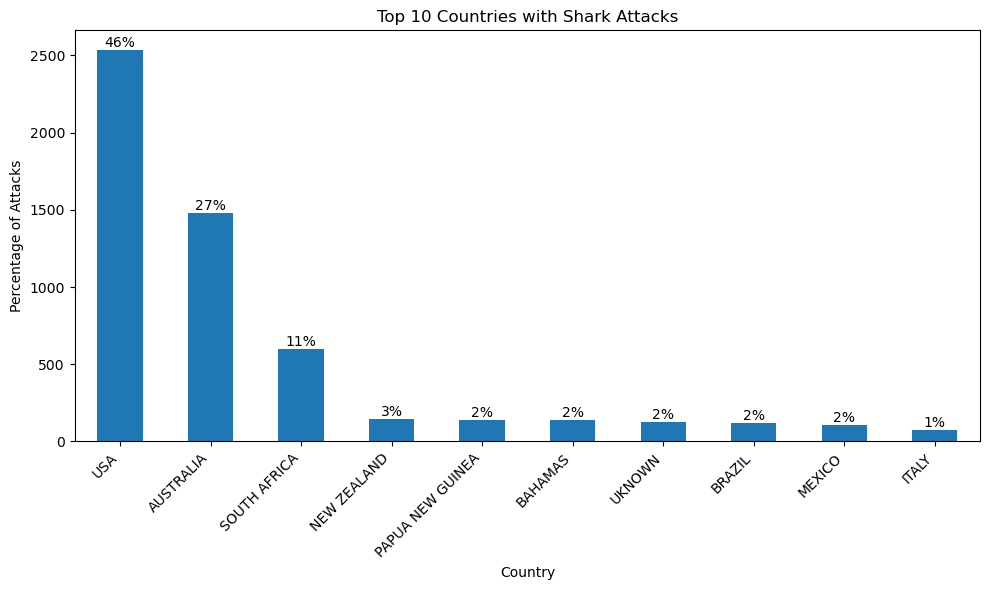

In [41]:

import matplotlib.pyplot as plt

# Country counts
country_counts = sharks_df['Country'].value_counts().head(10)  # Consider only the top 10 countries
total_attacks = country_counts.sum()

# Calculate percentages and round to whole numbers
percentages = (country_counts / total_attacks) * 100
percentages = percentages.round()

# Plotting
plt.figure(figsize=(10, 6))
bars = country_counts.plot(kind='bar')
plt.title('Top 10 Countries with Shark Attacks')
plt.xlabel('Country')
plt.ylabel('Percentage of Attacks')
plt.xticks(rotation=45, ha='right')

# Adding data callouts as percentage
for i, percent in enumerate(percentages):
    plt.annotate(f'{percent:.0f}%', xy=(i, country_counts[i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get country counts
country_counts = sharks_df['Country'].value_counts().head(30)

# Merge country counts with world map
world = world.merge(country_counts, how='left', left_on='name', right_on="Country")
world
# # Fill missing values with 0 (countries with no shark attacks)
# world[country_counts.name] = world[country_counts.name].fillna(0)

# # Calculate percentages
# total_attacks = country_counts.sum()
# world['Percentage'] = (world[country_counts.name] / total_attacks) * 100

# # Plotting
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# world.plot(column='Percentage', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# # Add title and legend
# ax.set_title('Percentage of Shark Attacks by Country', fontdict={'fontsize': '15'})
# ax.set_axis_off()
# plt.tight_layout()
# plt.show()

C:\Users\darce\AppData\Local\Temp\ipykernel_14992\3574272112.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,count
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN
...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


In [49]:
"asd" == "ASD"

False